# What is the Best Neighborhood to be a Plant?
## Introduction
For our final project, we analyzed the best neighborhood in the Pittsburgh area to be a plant. Our original thoughts led us to three categories that are important for plants: soil, water, and air. Due to the limited data sets on WPRDC, we couldn't exactly find anything that would directly help up in terms of water, such as rainfall or anything like that. Thus, we switched that topic to land cover area. Thus, we had 3 overall metrics: Soil Type, Land Cover Type, and Air Quality. 
## The Metrics
### Land Cover Areas
This metric shows the amount of land covered by Forest, Grassland, or Agriculture. We decided to use this metric because it is pretty self explanatory that where there are many plants currently, it would be good to be a plant. For one, there is strength in numbers. Secondly, a plant would have more friends where there are other plants. Lastly, areas that are mostly plant life are less likely to be disturbed.
### Air Quality
This metric finds the average concentration of particulate matter 2.5 in the air. We decided to use this metric because it measures the amount of PM 2.5 in the air which is basically tiny particles that include things that are bad for plants. So an area with less measured concentration of PM 2.5 is better for being a plants.
### Soil Type
Specifically, Soil Type has the attributes of a Soil Code and Class. Soil Code is a 2-3 letter code. Codes beginning with S or U are designated as being areas with Stripmines or Urban development respectively. Thus, any area with this code is poor for plantlife, and is not considered. From there, most soil types are just as well as the others, so we examine another sub-metric of Soil Code; steepness. In 3 letter codes, the last letter is either A, B, C, D, E, or F, which determine the steepness. A is a soil area that is nearly level at 0-2 percent slope, B is 2-8% slope, C:8-15% slope, etc. Steepness beyond 15% would again, be poor for plantlife, so we are only considering plants with a steepness code of B (A is not a common enough occurence to plot) Soils are placed into classes, between class 1, and class 4. Class 1 is categorized as typically high-yield, well fertilized soil. On the other end of the spectrum, class 4 is categorized as poor soil with a low ability to support plant-growth. Here we are only taking class 2 (Again, class 1 is not common enough to viably plot)
### Combination of Metrics
Because these metrics are less quantitative for the most part and more based on quality of areas, it doesn't make sense to apply one formula to determine the overall best neighborhoods. Instead, we will assign point values for each ranking per data set. For example, a first place ranking would grant 4 points, second 3, third 2, and fourth 1. In the end, we will total all the points and see what the best neighborhood is.

## Land Cover Areas:

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("Neighborhoods_.shp")
landCover = geopandas.read_file("Land_Cover.shp") # read in the shapefiles

# import dataset
lcaSet = pd.read_csv("Allegheny_County_Land_Cover_Areas.csv")

# Get only areas that are 3, 4, 5
query_mask1 = lcaSet['GRID_CODE'] < 6
query_mask2 = lcaSet['GRID_CODE'] > 2
newlca = lcaSet[query_mask1 & query_mask2]
newlca=newlca.loc[:,['FID',"GRID_CODE"]]
newlca.head(5)

,FID,GRID_CODE
1,2,3
2,3,5
4,5,5
5,6,3
6,7,3


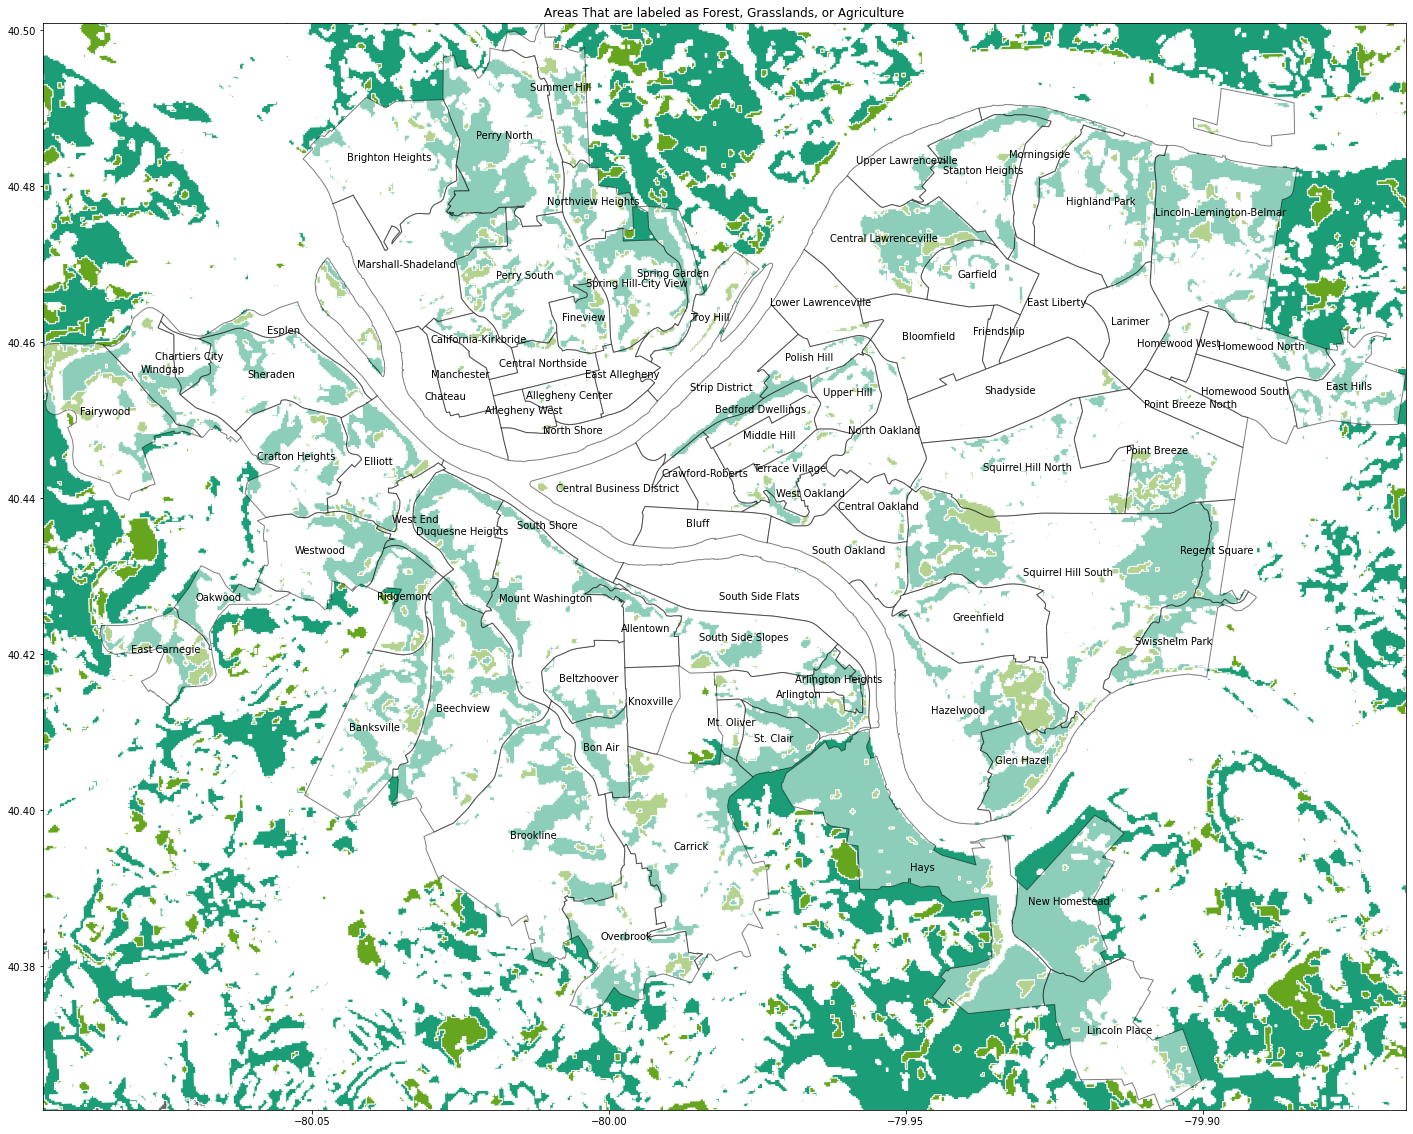

In [14]:
map = landCover.merge(newlca)
neighborhoodMap = neighborhoods
fig, ax = plt.subplots(figsize = (30,20))

crs = ("+proj=longlat +datum=WGS84 +no_defs") 
map = map.to_crs(crs=crs) 

for data in neighborhoodMap.groupby('hood'):
    color = 'white'

map.plot(column = 'GRID_CODE', cmap = 'Dark2', edgecolor = 'white', ax = ax)
nmap = neighborhoodMap.plot(color = color, ax = ax, alpha = 0.5, edgecolor = 'black')
neighborhoodMap.apply(lambda x: nmap.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

ax.set_ylim([40.36161042, 40.50096594])
ax.set_xlim([-80.09533686, -79.86577284])

ax.set(title = "Areas That are labeled as Forest, Grasslands, or Agriculture")
plt.show()

### Best Neighborhoods (Land Cover)
As mentioned before, the best neighborhoods are the most green. Using this method, the top 5 are:
* Hays (4 points)
* New Homestead (3)
* Glen Hazel (2)
* St. Clair (1)
* Ridgemont

The worst 5 are:
* South Side Flats
* Bluff
* Chateau
* Friendship
* Homewood South

## Air Quality

In [5]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
particulate = geopandas.read_file("ParticulateMatter2.5.shp")
# read in the shapefiles

# import dataset
pmSet = pd.read_csv("PM2.csv")


query_mask1 = pmSet['PM25'] < 13 
query_mask2 = pmSet['PM25'] > 0
newpm = pmSet[query_mask1 & query_mask2]
newpm=newpm.loc[:,['CensusTract',"PM25"]]
newpm.head(100)

,CensusTract,PM25
0,10300,12.264655
1,20100,12.283052
2,20300,12.241216
3,30500,12.234197
4,40200,12.315312
...,...,...
95,270400,12.215499
96,270800,12.192786
97,271500,12.205422
98,281400,12.240499


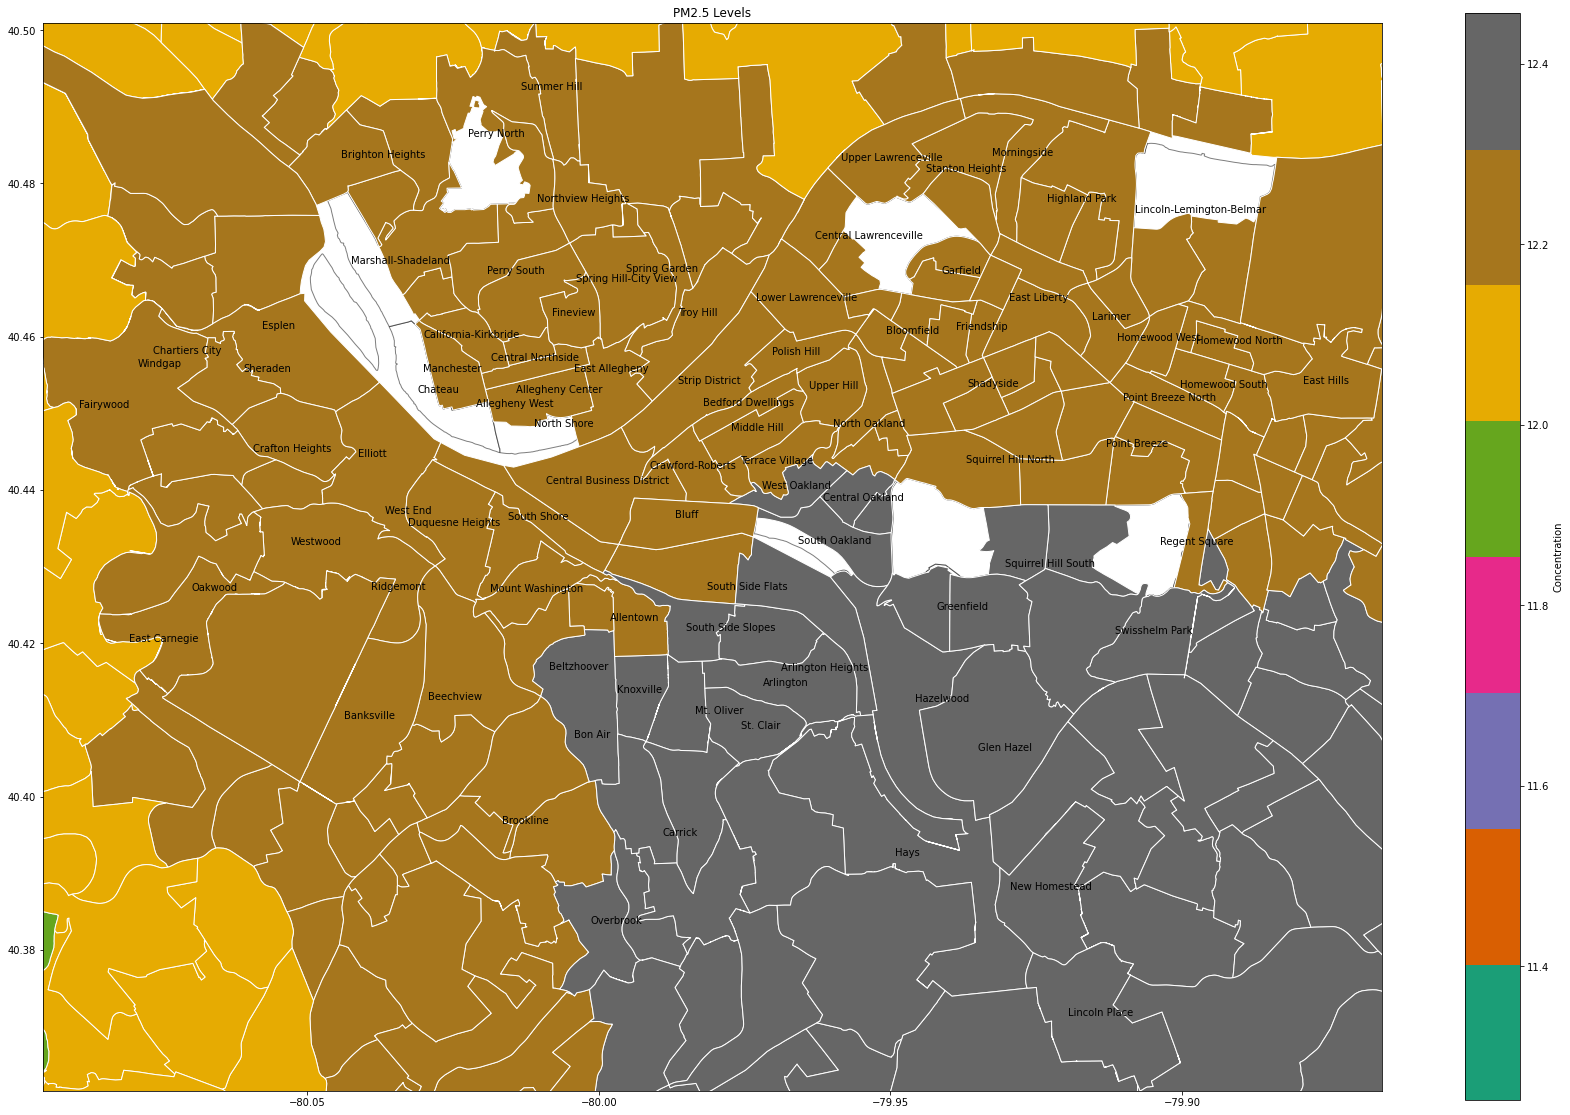

In [17]:
map = particulate.merge(newpm)
neighborhoodMap = neighborhoods
fig, ax = plt.subplots(figsize = (30,20))

crs = ("+proj=longlat +datum=WGS84 +no_defs") 
map = map.to_crs(crs=crs) 



for data in neighborhoodMap.groupby('hood'):
    color = 'white'
nmap = neighborhoodMap.plot(ax = ax, color = color, edgecolor = 'black', alpha = 0.5)
map.plot(column = 'PM25', cmap = 'Dark2', legend = True, legend_kwds={'label': "Concentration"}, edgecolor = 'white', ax = ax)
neighborhoodMap.apply(lambda x: nmap.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

ax.set_ylim([40.36161042, 40.50096594])
ax.set_xlim([-80.09533686, -79.86577284])

ax.set(title = "PM2.5 Levels")
plt.show()


### The Best Neighborhoods

The lighter the color the better the neighborhood for plants based on concentration of PM 2.5.

#### Top 5
* New Homestead (4 points)
* Arlington Heights (3)
* BeechView (2)
* Central Lawrencville (1)
* Perr North


#### Worst 3

* Greenfield
* Knoxville
* Hazel Wood


## Soil Type

In [19]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

neighborhoods = geopandas.read_file("Neighborhoods_.shp")
soilAreas = geopandas.read_file("Soils.shp")

soilSet = pd.read_csv("soils.csv")

soilSet = soilSet[soilSet['CLASS'].str.contains('O')==False]

query_mask1 = soilSet['CLASS'].astype(int) <= 2
filteredSoilSet = soilSet[query_mask1]
filteredSoilSet = filteredSoilSet.loc[:,['FID','CLASS']]

query_mask2 = soilSet['SOIL_CODE'].str[2] == 'B'
filteredSoilSet2 = soilSet[query_mask2]
filteredSoilSet2 = filteredSoilSet2.loc[:,['FID', 'SOIL_CODE']]

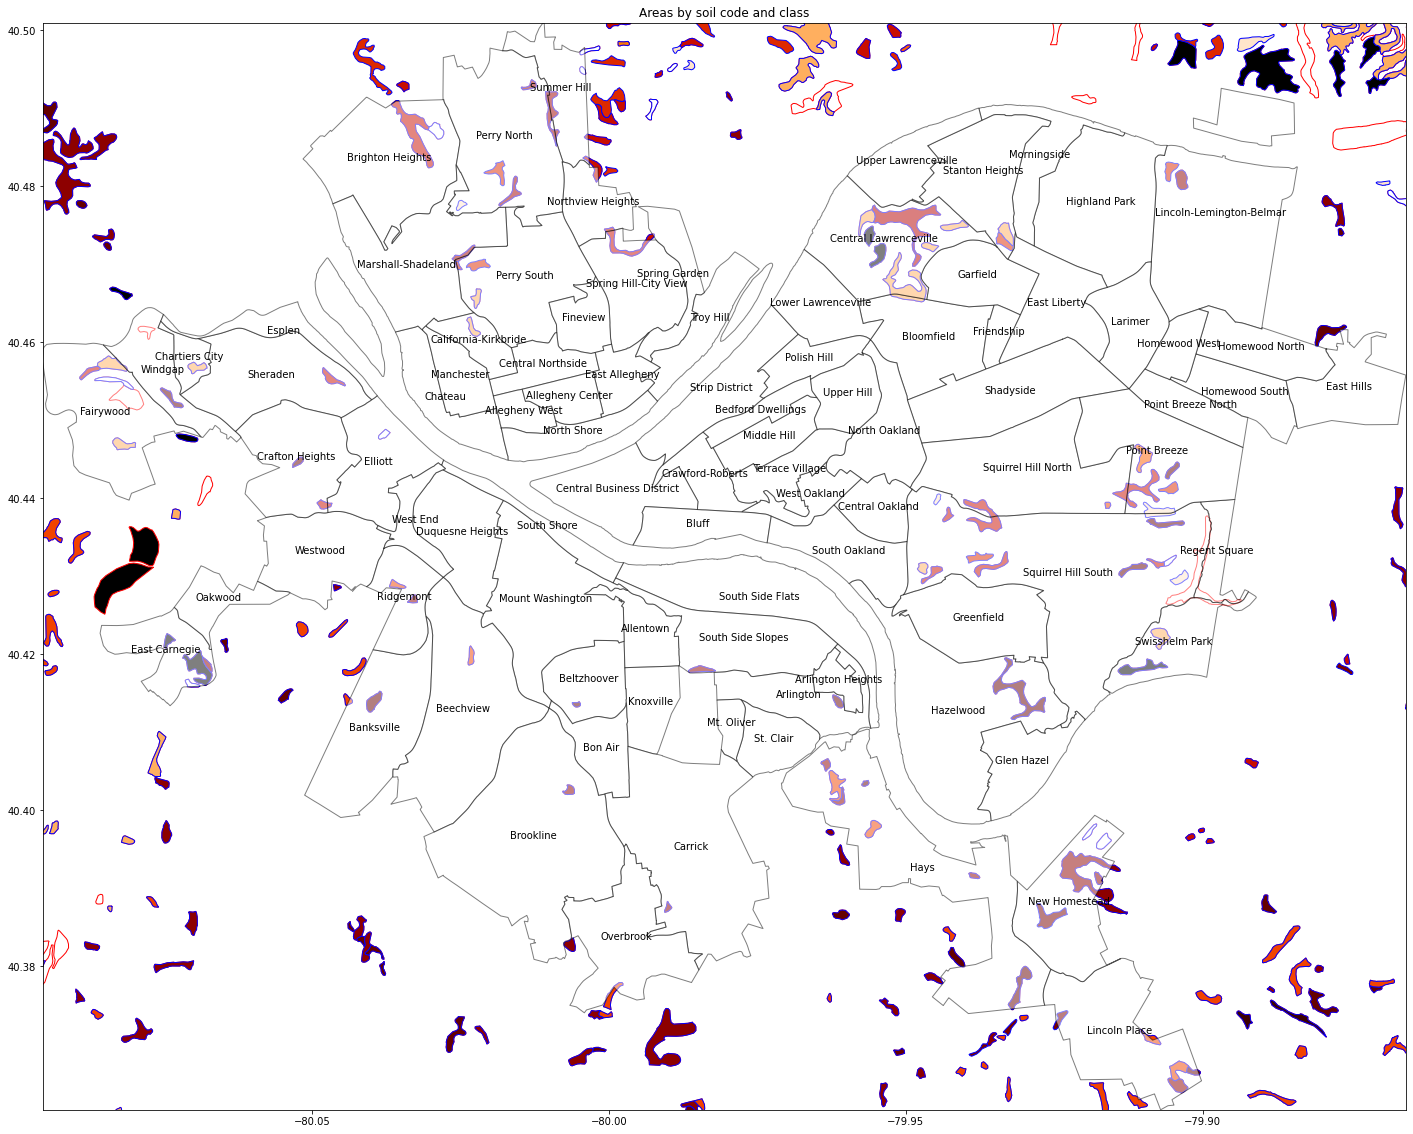

In [20]:
map = soilAreas.merge(filteredSoilSet)
map2 = soilAreas.merge(filteredSoilSet2)
neighborhoodMap = neighborhoods
fig, ax = plt.subplots(figsize = (30,20))

crs = ("+proj=longlat +datum=WGS84 +no_defs") 
map = map.to_crs(crs=crs) 
map2 = map2.to_crs(crs=crs)

for data in neighborhoodMap.groupby('hood'):
    color = 'white'

map.plot(column = 'CLASS', cmap = 'gist_heat', edgecolor = 'red', ax = ax)
map2.plot(column = 'SOIL_CODE', cmap = 'gist_heat', edgecolor = 'blue', ax = ax)
nmap = neighborhoodMap.plot(color = color, ax = ax, alpha = 0.5, edgecolor = 'black')
neighborhoodMap.apply(lambda x: nmap.annotate(s=x.hood, xy=x.geometry.centroid.coords[0], ha='center'), axis=1);

ax.set_ylim([40.36161042, 40.50096594])
ax.set_xlim([-80.09533686, -79.86577284])
ax.set(title = "Areas by soil code and class")
plt.show()

Rankings: 
* Central Lawrenceville (4 points)
* Squirrel Hill South (3)
* Point Breeze (2)
* New Homestead (1)

## OVERALL BEST NEIGHBORHOODS:

1) New Homestead (8)
</br>
2) Central Lawrenceville (5)
</br>
3) Hays (4)


## Conclusions:
### Griffin:
I don't really have a "favorite" neighborhood as I'm not a plant, but I did have some expectations. I assumed that places near downtown like the Southside Flats and Oakland probably wouldn't be great to be a plant due to all of the urban development. These expectations were confirmed through the data, which makes sense, as none of the places show up in our top 5's. My dataset individually shows a pretty good visualization of how as you move away from downtown, the plant life increases. 
### Mason:
Conclusion Here
### Kory:
Conclusion Here